In [1]:
# import necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import parser
from keras.utils import get_file
import numpy as np
import argparse
import cv2
import os
import cvlib as cv
import matplotlib.pyplot as plt

# handle command line arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help="path to input image")
#args = ap.parse_args()

# download pre-trained model file (one-time download)
#dwnld_link = "https://github.com/arunponnusamy/cvlib/releases/download/v0.2.0/gender_detection.model"
#model_path = get_file("gender_detection.model", dwnld_link,cache_subdir="pre-trained", cache_dir=os.getcwd())
model = load_model("gender_detection.model")

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


[0.99858785 0.00133545]
['man', 'woman']


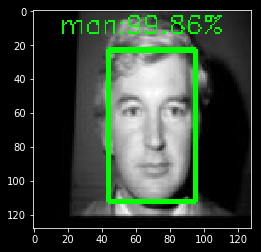

In [2]:
# read input image
#image = cv2.imread(args.image)
image = cv2.imread('m122.jpg')

if image is None:
    print("Could not read input image")
    exit()

# detect faces in the image
face, confidence = cv.detect_face(image)

classes = ['man','woman']

# loop through detected faces
for idx, f in enumerate(face):
    if idx == 0:
     # get corner points of face rectangle       
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

    # draw rectangle over face
        cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
        face_crop = np.copy(image[startY:endY,startX:endX])

    # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
        conf = model.predict(face_crop)[0]
        print(conf)
        print(classes)

    # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}:{:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
        cv2.putText(image, label, (15, Y),  cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 255, 0), 1)

plt.imshow(image)
plt.show()

#command line version
# display output
#cv2.imshow("gender detection", image)

# press any key to close window           
#cv2.waitKey()

# save output
#cv2.imwrite("gender_detection2.jpg", image)

# release resources
#cv2.destroyAllWindows()